<b>Problem 1</b>. We use $K$-means to cluster handwritten digit data from the MNIST dataset.  We will use 1000 examples of each of the $10$ digits.  If $\mu_k$ denotes the center of cluster $k$, the $K$-means objective function is
$$
J(x, z) = \sum_{n} \sum_{k} z_{nk} ||x_{n} - \mu_k ||_2^2
$$
where $z_{nk} =1$ iff example $n$ is assigned to cluster $k$ and $0$ otherwise.

<b>1.a)</b> Implement a clustering method that runs a greedy $K$-means algorithm to convergence.  Run your algorithm on the provided MNIST data, choosing as an initialization $10$ random examples.  Plot the $K$-means objective as a function of the iteration number, verifying that it monotonically decreases.  Plot the centroids learned by the algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imp
import hw8
from scipy.io import loadmat

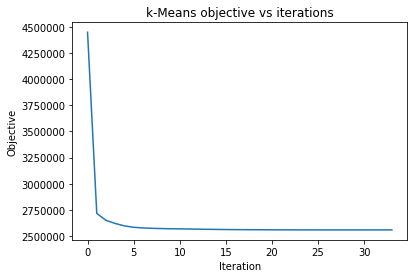

In [5]:
imp.reload(hw8)
data = loadmat('mnist_cluster.mat')
xTrain, yTrain = data['Xtrain'], data['Ytrain']
kM = hw8.kMeans()
kM.fit(xTrain, 10)
plt.plot(kM.J)
plt.xlabel('Iteration')
plt.ylabel('Objective')
plt.title('k-Means objective vs iterations')
plt.show()

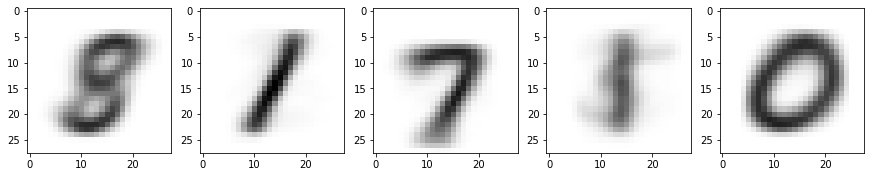

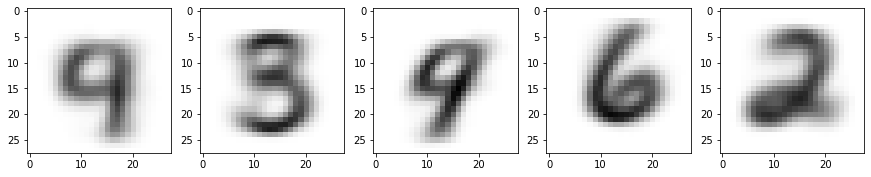

In [8]:
imp.reload(hw8)
for i in range(2):
    hw8.plot5(kM.mu[5*i:5*(i+1), :])

<b>1.b)</b> Run the $K$-means algorithm $10$ times with different random initalizations as stated above.  Evaluate the consistency of the resulting clustering with the true clusters using the Rand index.  Create a scatter plot comparing Rand index to the final value of the $K$-means objective function obtained during the fitting process.

In [22]:
imp.reload(hw8)
Rand = np.zeros(10)
J = np.zeros(10)
for i in range(10):
    kM = hw8.kMeans()
    kM.fit(xTrain, 10)
    J[i] = kM.J[len(kM.J)-1]
    Rand[i] = hw8.randInd(yTrain-1,kM.clusters, 10)

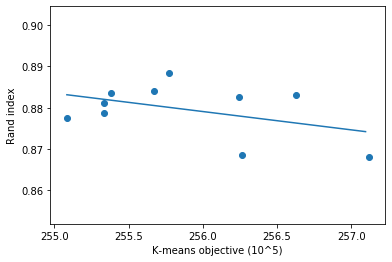

R^2: 0.1939


In [43]:
from scipy import stats
plt.scatter(J/10000, Rand)
m, b, r_value, _, _ = stats.linregress(J/10000,Rand)
x = (np.arange(100)*(np.max(J)-np.min(J))/(100)+np.min(J))/10000
y = x*m + b
plt.ylabel('Rand index'), plt.xlabel('K-means objective (10^5)')
plt.plot(x, y)
plt.show()
print('R^2: '+'{:.4f}'.format(r_value*r_value))

<b>1.c)</b> The performance of clustering algorithms can be improved by using a 'warm-start.' Run $K$-means by initializing from the means of the true clusters.  Compare the resulting Rand index and objective function to the best values from (b).

In [61]:
muInit = np.zeros((10,xTrain.shape[1]) )
for i in range(10):
    I = np.where(yTrain==i+1)[0]
    muInit[i, :] = np.mean(xTrain[I, :], axis=0)
kM = hw8.kMeans()
kM.fit(xTrain, 10, init=muInit)

In [65]:
print('Rand index with warm start: '+'{:4f}'.format(hw8.randInd(yTrain-1, kM.clusters, 10)))
print('Best rand index with random start: '+'{:4f}'.format(np.max(Rand)))
print('Objective with warm start:', kM.J[len(kM.J)-1])
print('Best objective with random start:', np.min(J))

Rand index with warm start: 0.895542
Best rand index with random start: 0.888323
Objective with warm start: 2565256.4788478655
Best objective with random start: 2550845.4443


<b>1.d)</b> Consider how $K$-means performs when the number of clusters, $K$ is varied.  For each $K \in \{ 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100\}$, run $K$-means to convergence from a single random initialization.  Plot the $K$-means objective function and the Rand index versus $K$.  Which value of $K$ minimizes the lowest objective function? Which gives the largest Rand index? Plot the inferred centroids for the largest Rand index model.

In [70]:
imp.reload(hw8)
Ks = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
JJ = []
rand = []
centroids = {}
for K in Ks:
    kM = hw8.kMeans()
    kM.fit(xTrain, K)
    JJ.append(kM.J[len(kM.J)-1])
    rand.append(hw8.randInd(yTrain-1, kM.clusters, 10, k2=K))
    centroids[str(K)]=kM.mu

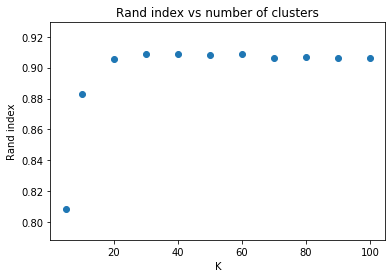

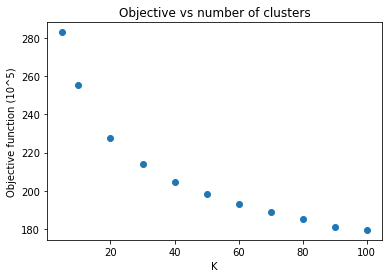

In [75]:
plt.scatter(Ks, rand)
plt.title('Rand index vs number of clusters'), plt.xlabel('K'), plt.ylabel('Rand index')
plt.show()
plt.scatter(Ks, np.asarray(JJ)/10000)
plt.title('Objective vs number of clusters'), plt.xlabel('K'), plt.ylabel('Objective function (10^5)')
plt.show()

K with highest rand index: 40


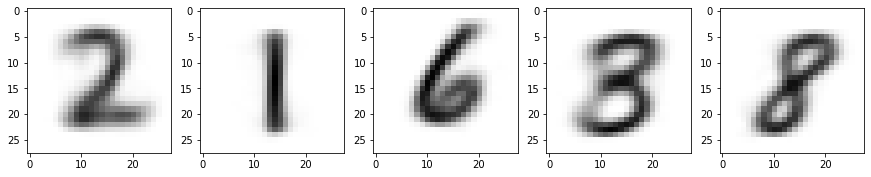

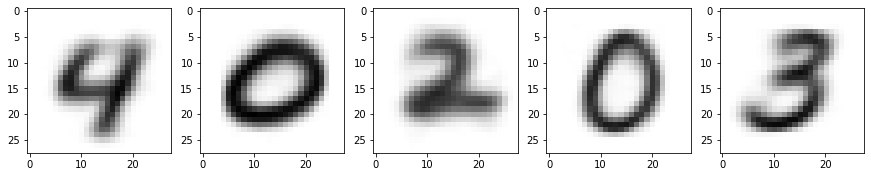

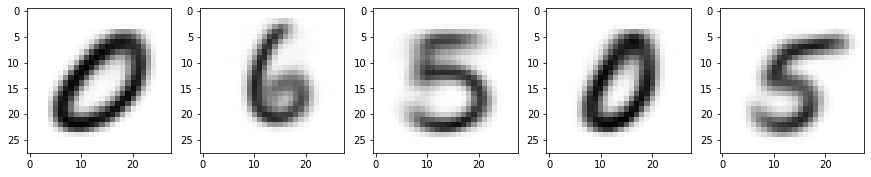

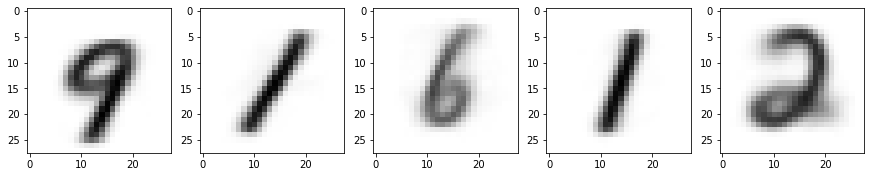

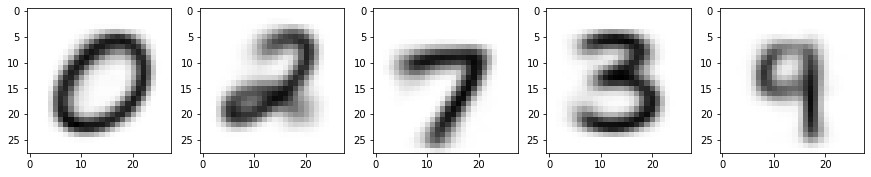

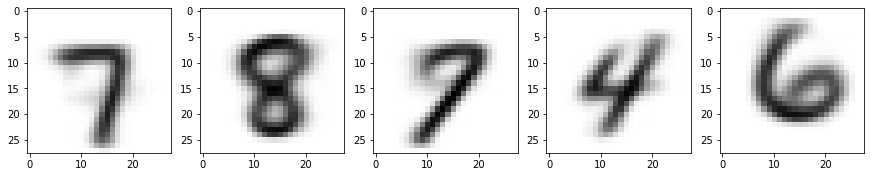

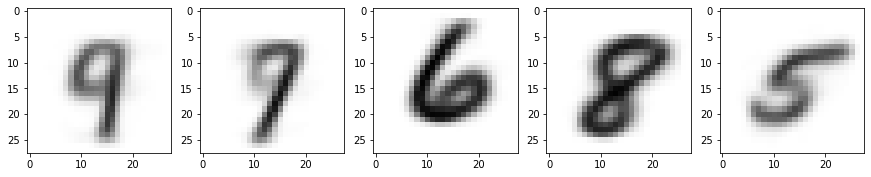

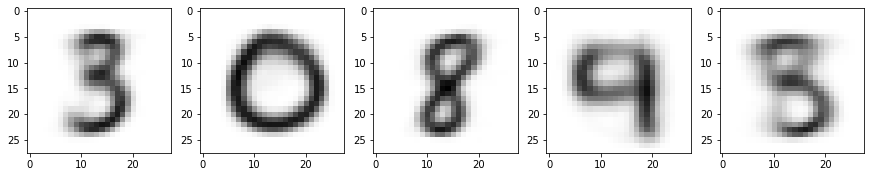

In [83]:
K = Ks[np.argmax(np.asarray(rand))]
print('K with highest rand index:', K)
for i in range(int(K/5)):
    hw8.plot5(centroids[str(K)][5*i:5*(i+1), :])

<b> Problem 2.</b> In this question we implement a Bernoulli mixture model to perform unsupervised clustering on a datset of English words annotated by a large set of binary features.  There are 541 unique words with 824 binary features.

We use the EM algorithm implementation from the pmtk toolbox (note: the EM algorithm for this model is relatively straightforward so I implemented it by hand) to fit the model.

<b>2.a)</b> Run the EM algorithm on the word dataset using $K=8$ clusters.  Plot the log likelihood versus iteration.

In [2]:
data2 = loadmat('wordcat.mat')
xTrain, words, features = data2['Xtrain'], data2['Xlabels'], data2['featLabels']

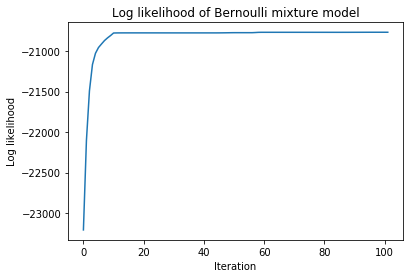

In [4]:
imp.reload(hw8)
bC = hw8.bernoulliEM()
bC.fit(xTrain-1.0, 8)
plt.plot(bC.obj)
plt.xlabel('Iteration'), plt.ylabel('Log likelihood'), plt.title('Log likelihood of Bernoulli mixture model')
plt.show()

<b>2.b)</b> Repeat this experiment $10$ times, running the EM algorithm from $10$ different random initializations.  Select the models with highest and lowest log likelihoods.  By calculating the posterior distribution, list the $5$ words most likely to be associated with each of the $K=8$ mixture components for each model.

In [5]:
model = {}
objective = np.zeros(10)
for i in range(10):
    model[str(i)] = hw8.bernoulliEM()
    model[str(i)].fit(xTrain-1.0, 8)
    objective[i] = model[str(i)].obj[-1]

In [14]:
best = model[str(np.argmax(objective))]
worst = model[str(np.argmin(objective))]
print('Words associated with mixture components of best model:\n')
hw8.printLabels(best.prob(xTrain-1.0), words, 8)
print('\nWords associated with mixture components of worst model:\n')
hw8.printLabels(worst.prob(xTrain-1.0), words, 8)

Words associated with mixture components of best model:

Top words associated with cluster 0: eagle, iguana, python, goose, goat, 
Top words associated with cluster 1: crossbow, canoe, board_(wood), cork, bow_(weapon), 
Top words associated with cluster 2: cabbage, dandelion, toaster, cathedral, tricycle, 
Top words associated with cluster 3: gloves, shotgun, lamb, slippers, trousers, 
Top words associated with cluster 4: hyena, panther, fox, coyote, cheetah, 
Top words associated with cluster 5: cushion, swimsuit, belt, inn, scooter, 
Top words associated with cluster 6: flute, yacht, jet, couch, helicopter, 
Top words associated with cluster 7: knife, curtains, door, bomb, whip, 

Words associated with mixture components of worst model:

Top words associated with cluster 0: bayonet, bomb, bazooka, shotgun, missile, 
Top words associated with cluster 1: mushroom, board_(black), blueberry, eggplant, goat, 
Top words associated with cluster 2: trolley, unicycle, bike, scooter, tricycle,

<b>2.c)</b> Use the feature labels to list the top $5$ features associated with each mixture component, for the best and worst models found in part b.

In [15]:
print('Features associated with mixture components of best model:\n')
hw8.printFeatures(best.mu, features, 8)
print('\nFeatures associated with mixture components of worst model:\n')
hw8.printFeatures(worst.mu, features, 8)

Features associated with mixture components of best model:

Top features associated with cluster 0: a_bird,has_wings,beh_-_flies,is_small,an_animal,
Top features associated with cluster 1: is_dangerous,a_weapon,is_brown,is_long,made_of_wood,
Top features associated with cluster 2: is_round,a_vegetable,is_small,made_of_metal,is_edible,
Top features associated with cluster 3: grows_on_trees,tastes_sweet,a_fruit,different_colours,clothing,
Top features associated with cluster 4: beh_-_hunts,is_fast,has_4_legs,an_animal,a_carnivore,
Top features associated with cluster 5: worn_by_women,used_for_transportation,is_long,clothing,different_colours,
Top features associated with cluster 6: inbeh_-_produces_music,a_musical_instrument,made_of_metal,made_of_wood,is_large,
Top features associated with cluster 7: made_of_plastic,is_long,has_a_handle,is_round,made_of_metal,

Features associated with mixture components of worst model:

Top features associated with cluster 0: used_for_killing,is_destruc